In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from enum import Enum

from mesa import Model, Agent
from mesa.discrete_space import OrthogonalMooreGrid, FixedAgent
from mesa.datacollection import DataCollector


from mesa.visualization import draw_space


class StateOfTree(Enum):
    HEALTHY = 0
    BURNING = 1 
    DEAD = 2

    
class ForestFire(Model):


    def __init__(self, height=20, width=20, density=0.9, seed=None):
        super().__init__(seed=seed)
        self.space = OrthogonalMooreGrid((height, width), torus=False, capacity=1, random=seed)
        
        for cell in self.space.all_cells:
            if self.random.random() < density:
                # Create a tree
                tree = Tree(self, cell)

    def step(self):
        """
        Run one step of the model.
        """
        self.agents.shuffle_do("step")


class Tree(FixedAgent):


    def __init__(self, model, cell):
        super().__init__(model)
        self.cell = cell
        self.state = StateOfTree.HEALTHY
        
    def step(self):
        if self.state == StateOfTree.BURNING:
            for neighbor in self.cell.neighborhood.agents:
                if neighbor.status == StateOfTree.HEALTHY:
                    neighbor.status = StateOfTree.BURNING
            # implicit assumption of 1 tick for burning down
            self.state = StateOfTree.DEAD


def agent_portrayal(agent):
    colors = {StateOfTree.HEALTHY: "tab:green",
              StateOfTree.BURNING: "tab:orange",
              StateOfTree.DEAD: "tab:brown"}
    return {"color":colors[agent.state], "marker":'s', "size":14}

def plot_model(model):
    sns.set_style('white')
    fig, ax = plt.subplots()
    draw_space(model.space, agent_portrayal=agent_portrayal, ax=ax, draw_grid=False)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return fig
    
    

In [65]:
model = ForestFire(100, 100, seed=12345)
model.agents[0].state = StateOfTree.BURNING


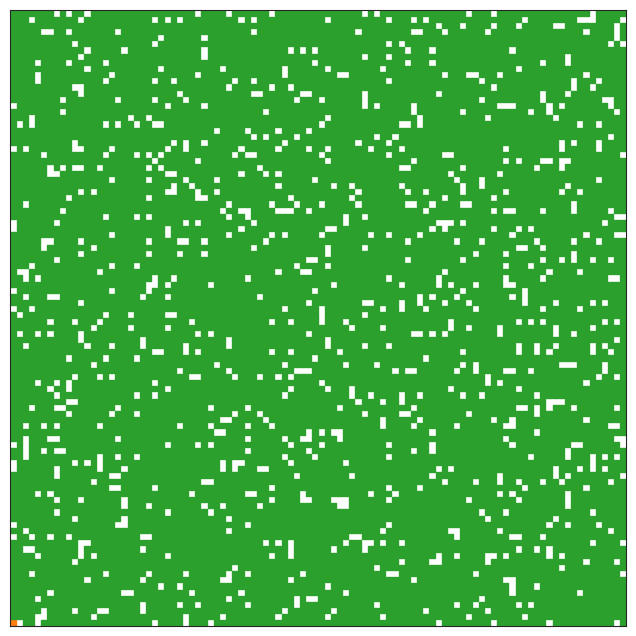

In [66]:
plot_model(model)
plt.show()